In [106]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# KNN
from sklearn.neighbors import KNeighborsClassifier

# split data jadi training dan testing data
from sklearn.model_selection import train_test_split

# Support Vector Machine
from sklearn.svm import SVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forst
from sklearn.ensemble import RandomForestClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# scaling, encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

# untuk visualisasi decision tree, kita perlu bantuan bbrp package
import sklearn.tree as tree
from six import StringIO 
import pydotplus 
from IPython.display import Image


## Data yang digunakan sebagai masukan bagi machine learning adalah:
   bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs

In [107]:
bank_41190=pd.read_csv('bank-additional.csv',sep=';')
bank_41190['isdeposit'] = bank_41190.y.replace({'yes':1, 'no':0})
print(bank_41190.shape)
print(bank_41190.columns)
print(bank_41190.info())

bank_41190.isnull().sum()

(4119, 22)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'isdeposit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
isdeposit         0
dtype: int64

## Plot

In [108]:
df_age_deposit = pd.DataFrame()

for dpsit in bank_41190['isdeposit'].value_counts().index:
    df_age = bank_41190[bank_41190['isdeposit']==dpsit]
    df_age_deposit[dpsit] = df_age.groupby('age')['isdeposit'].count()

df_age_deposit


,0,1
age,,
18,2,1.0
19,1,NaN
20,4,NaN
21,4,3.0
22,8,2.0
...,...,...
78,2,1.0
80,1,3.0
81,1,2.0


Text(0, 0.5, 'Jumlah orang buka deposito')

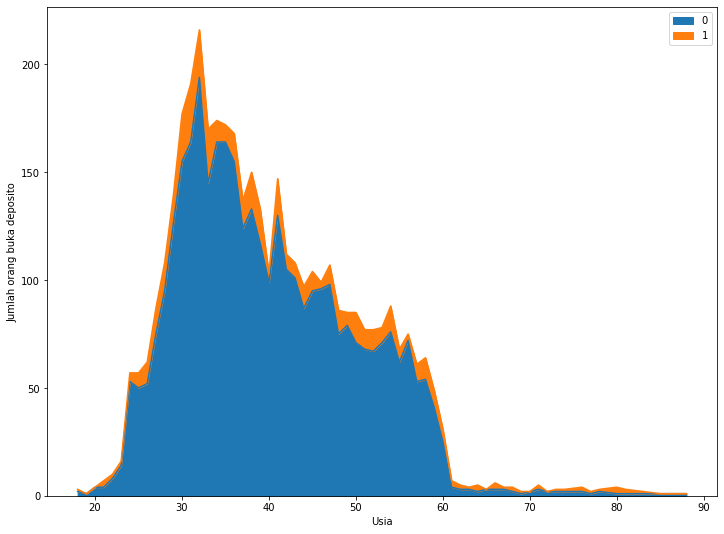

In [109]:
df_age_deposit.plot(kind='area',figsize=(12,9))
plt.xlabel('Usia')
plt.ylabel('Jumlah orang buka deposito')

## Sebaran data pada Bank CSV additional terlihat usia 20-60 banyak yang belum buka deposito


## Model machine learning menggunakan LOGISTIC REGRESSION

In [110]:
#split dataset in features and target variable
feature_cols = ['age', 'campaign', 'duration', 'cons.price.idx']
fitur = bank_41190[feature_cols] # Features
target = bank_41190.y # Target variable

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      3668
         yes       0.62      0.19      0.29       451

    accuracy                           0.90      4119
   macro avg       0.77      0.59      0.62      4119
weighted avg       0.88      0.90      0.87      4119



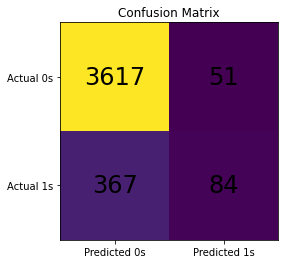

In [111]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(fitur, target)
target_prediksi = model.predict(fitur)

print(classification_report(target, target_prediksi))

cm = confusion_matrix(target, target_prediksi)

fig, ax = plt.subplots(figsize=(4, 4)) 
ax.imshow(cm) 
ax.grid(False) 
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5) 

for i in range(2): 
    for j in range(2): 
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24) 

plt.title("Confusion Matrix")        
plt.show()


## Model machine learning menggunakan KNN

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      3668
         yes       1.00      1.00      1.00       451

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119

[[3668    0]
 [   0  451]]


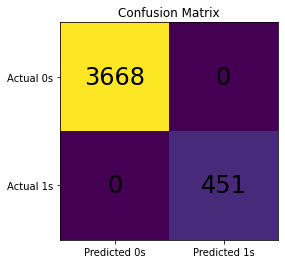

In [112]:
n=1
feature_cols = ['age', 'campaign', 'duration', 'cons.price.idx']
fitur_knn = bank_41190[feature_cols] # Features
target_knn = bank_41190.y # Target variable


model = KNeighborsClassifier(n_neighbors=n) # kita bisa pilih jumlah neighbor k brp
model.fit(fitur_knn, target_knn)
target_prediksi_KNN = model.predict(fitur_knn)

print(classification_report(target_knn, target_prediksi_KNN))
print(confusion_matrix(target_knn,target_prediksi_KNN))



cm = confusion_matrix(target_knn, target_prediksi_KNN)

fig, ax = plt.subplots(figsize=(4, 4)) 
ax.imshow(cm) 
ax.grid(False) 
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5) 

for i in range(2): 
    for j in range(2): 
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24) 

plt.title("Confusion Matrix")        
plt.show()

## Model machine learning menggnunakan SVM

In [113]:
feature_cols = ['age', 'campaign', 'duration', 'cons.price.idx']
fitur_svm = bank_41190[feature_cols] # Features
target_svm = bank_41190.y # Target variable

scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur_svm)



# pisahin jadi training dan testing data
x_train, x_test, y_train, y_test = train_test_split(fitur_scaled, target_svm, random_state = 0)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(3089, 4) (1030, 4)
(3089,) (1030,)


In [114]:
# buat dan latih model
model = SVC()
model.fit(x_train, y_train)


SVC()

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       929
         yes       0.50      0.17      0.25       101

    accuracy                           0.90      1030
   macro avg       0.71      0.58      0.60      1030
weighted avg       0.87      0.90      0.88      1030

[[912  17]
 [ 84  17]]


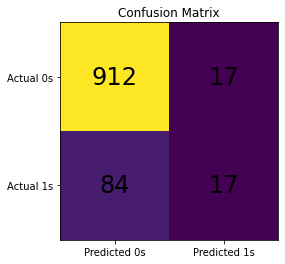

In [115]:
# evaluasi
target_svm = model.predict(x_test)
print(classification_report(y_test, target_svm))
print(confusion_matrix(y_test, target_svm))


cm = confusion_matrix(y_test, target_svm)

fig, ax = plt.subplots(figsize=(4, 4)) 
ax.imshow(cm) 
ax.grid(False) 
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5) 

for i in range(2): 
    for j in range(2): 
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24) 

plt.title("Confusion Matrix")        
plt.show()

## Model machine learning menggunakan DECISION TREE

              precision    recall  f1-score   support

          no       0.94      0.91      0.92       929
         yes       0.35      0.45      0.39       101

    accuracy                           0.87      1030
   macro avg       0.64      0.68      0.66      1030
weighted avg       0.88      0.87      0.87      1030

[[846  83]
 [ 56  45]]


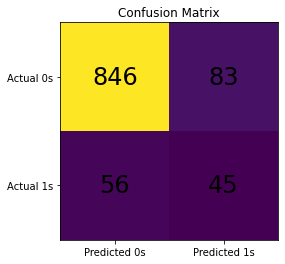

In [116]:
# buat dan latih model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# evaluasi
hasil_prediksi = model.predict(x_test)
print(classification_report(y_test, hasil_prediksi))
print(confusion_matrix(y_test, hasil_prediksi))

cm = confusion_matrix(y_test, hasil_prediksi)

fig, ax = plt.subplots(figsize=(4, 4)) 
ax.imshow(cm) 
ax.grid(False) 
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5) 

for i in range(2): 
    for j in range(2): 
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24) 

plt.title("Confusion Matrix")        
plt.show()

## Model machine learning menggunakan RANDOM FOREST

              precision    recall  f1-score   support

          no       0.92      0.98      0.95       929
         yes       0.50      0.23      0.31       101

    accuracy                           0.90      1030
   macro avg       0.71      0.60      0.63      1030
weighted avg       0.88      0.90      0.89      1030

[[906  23]
 [ 78  23]]


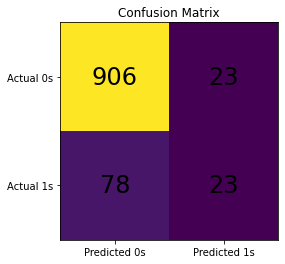

In [117]:
# buat dan latih model, kemudian evaluasi
model = RandomForestClassifier(max_depth=4)
model.fit(x_train, y_train)

hasil_prediksi = model.predict(x_test)
print(classification_report(y_test, hasil_prediksi))
print(confusion_matrix(y_test, hasil_prediksi))

cm = confusion_matrix(y_test, hasil_prediksi)

fig, ax = plt.subplots(figsize=(4, 4)) 
ax.imshow(cm) 
ax.grid(False) 
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5) 

for i in range(2): 
    for j in range(2): 
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24) 

plt.title("Confusion Matrix")        
plt.show()

In [118]:
model.feature_importances_

array([0.12150105, 0.02837837, 0.60045351, 0.24966707])

## Model machine learning menggunakan NAIVE BAYES

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      3668
         yes       0.56      0.36      0.44       451

    accuracy                           0.90      4119
   macro avg       0.74      0.66      0.69      4119
weighted avg       0.89      0.90      0.89      4119

[[3541  127]
 [ 288  163]]


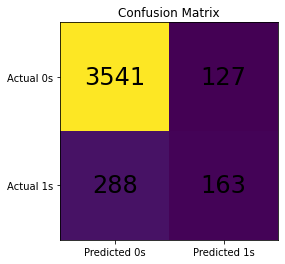

In [119]:

feature_cols = ['age', 'campaign', 'duration', 'cons.price.idx']
fitur_bys = bank_41190[feature_cols] # Features
target_bys = bank_41190.y # Target variable

model = GaussianNB()
model.fit(fitur_bys, target_bys)

# evaluasi
hasil_prediksi = model.predict(fitur_bys)
print(classification_report(target_bys, hasil_prediksi))
print(confusion_matrix(target_bys, hasil_prediksi))


cm = confusion_matrix(target_bys, hasil_prediksi)

fig, ax = plt.subplots(figsize=(4, 4)) 
ax.imshow(cm) 
ax.grid(False) 
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) 
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s')) 
ax.set_ylim(1.5, -0.5) 

for i in range(2): 
    for j in range(2): 
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24) 

plt.title("Confusion Matrix")        
plt.show()

## dari seluruh model machine learning, model yang akurat dengan decision tree